<a href="https://colab.research.google.com/github/alcome1614/proj_num/blob/main/30_01_2024_prof.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#library imports
import numpy as np
import matplotlib.pyplot as plt

# Reminder of the Verlet method scheme

$$x(t+s) = 2x(t) - x(t-s) + s^2 a(t)$$

$$x(t) = 2x(t-s) - x(t-2s) + s^2 a(t-s)$$

In order to compute the velocity we use:

$$ v(t) = \dfrac{x(t+s)-x(t-s)}{2s}$$

Notice that we need a point in the timestep $t+s$ to compute the velocity at $t$ ($v(t)$).

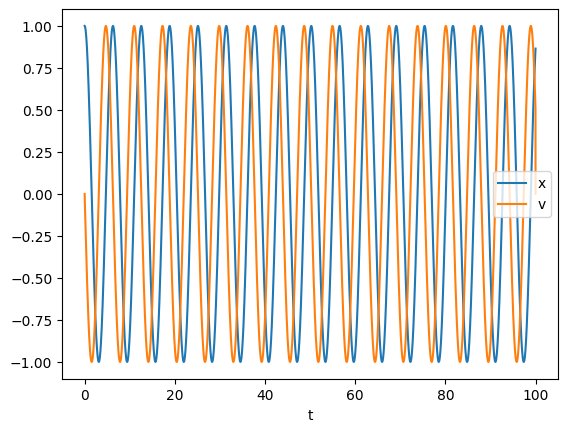

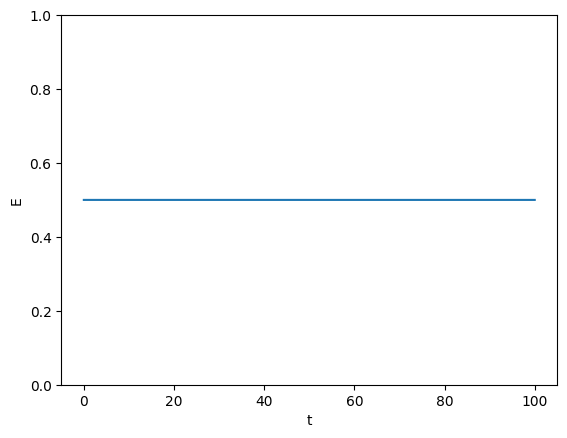

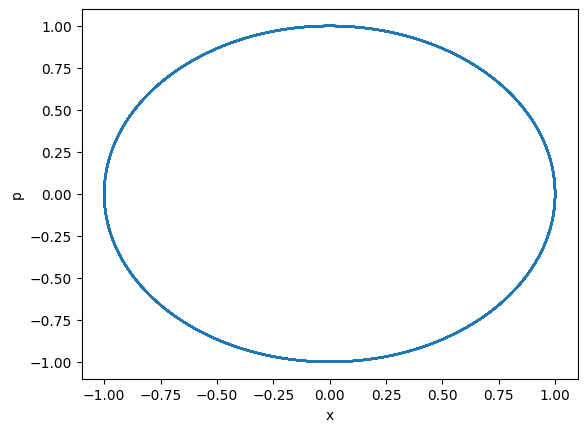

In [ ]:
#Model parameters
k = 1
m = 1

#Integration parameters
N_steps = 10000
dt = 0.01

#Initialization of variables
t = np.zeros(N_steps+2)
x = np.zeros(N_steps+2)
v = np.zeros(N_steps+2)
a = np.zeros(N_steps+2)
E = np.zeros(N_steps+2)

#Initial conditions
x[1] = 1
v[1] = 0
x[0] = x[1] - v[1]*dt
E[1] = 0.5*v[1]**2 + 0.5*x[1]**2

#Integration steps
for i_t in range(2,N_steps+2):
  a[i_t-1] = - k/m* x[i_t-1]
  t[i_t] = t[i_t-1] + dt
  x[i_t] = 2*x[i_t-1] - x[i_t -2] + dt**2 * a[i_t-1]

for i_t in range(2,N_steps+1):
  v[i_t] = (x[i_t+1] - x[i_t-1])/(2*dt)
  E[i_t] = 0.5*v[i_t]**2 + 0.5*x[i_t]**2

#Plotting
plt.plot(t,x, label="x")
plt.plot(t,v, label="v")
# plt.ylabel("x")
plt.xlabel("t")
plt.legend()
plt.show()

plt.plot(t[1:-1],E[1:-1])
plt.ylabel("E")
plt.xlabel("t")
plt.ylim(bottom=0, top=1)
plt.show()

plt.plot(x[1:-1],m*v[1:-1])
plt.xlabel("x")
plt.ylabel("p")
plt.show()

# Verlet Method (Velocities variant)

This method is equivalent to the standard we have already introduced.

$$
\begin{eqnarray}
x(t+h) & = & x(t) + h v(t) + \dfrac{h^2}{2} a(t) \\
v(t+h) & = & v(t) + h\dfrac{a(t+h)+ a(t)}{2}
\end{eqnarray}
$$

As an **exercise** you should proof both are equivalent.

Notice now we need only to know what happens at time $t$ to compute what happens at the next timestep $t+h$.


Let's apply it now to the harmonic oscillator.

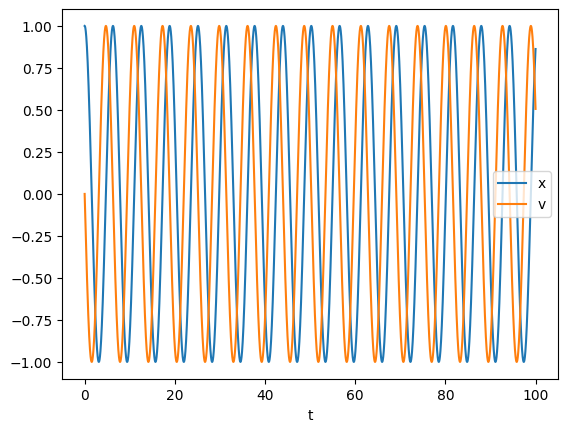

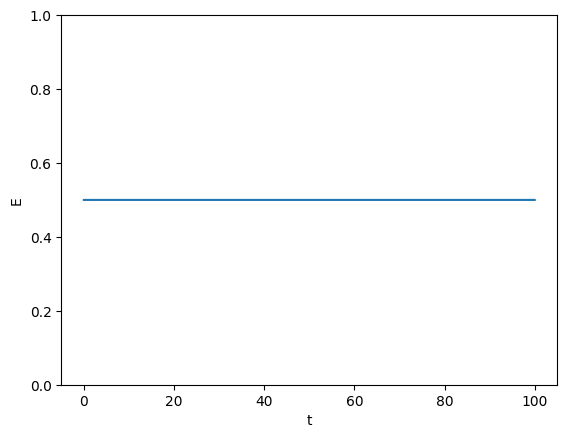

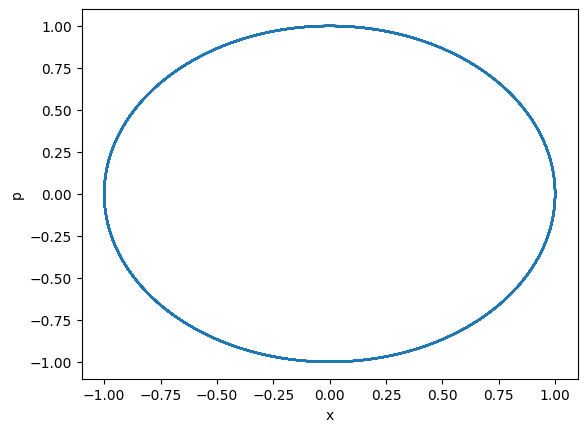

In [ ]:
#Model parameters
k = 1
m = 1

#Integration parameters
N_steps = 10000
dt = 0.01

#Initialization of variables
t = np.zeros(N_steps+1)
x = np.zeros(N_steps+1)
v = np.zeros(N_steps+1)
a = np.zeros(N_steps+1)
E = np.zeros(N_steps+1)

#Initial conditions
x[0] = 1
v[0] = 0
a[0] =  -k/m*x[0]
E[0] = 0.5*m*v[0]**2 + 0.5*k*x[0]**2

#Integration steps
for i_t in range(1,N_steps+1):
  t[i_t] = t[i_t-1] + dt
  x[i_t] = x[i_t-1] + dt*v[i_t-1] + dt**2/2 * a[i_t-1]
  a[i_t] = - k/m* x[i_t]
  v[i_t] = v[i_t-1] + dt/2*(a[i_t]+a[i_t-1])
  E[i_t] = 0.5*m*v[i_t]**2 + 0.5*k*x[i_t]**2

#Plotting
plt.plot(t,x, label="x")
plt.plot(t,v, label="v")
# plt.ylabel("x")
plt.xlabel("t")
plt.legend()
plt.show()

plt.plot(t[1:-1],E[1:-1])
plt.ylabel("E")
plt.xlabel("t")
plt.ylim(bottom=0, top=1)
plt.show()

plt.plot(x[1:-1],m*v[1:-1])
plt.xlabel("x")
plt.ylabel("p")
plt.show()

# Lennard-Jones Potential

$V_\text{LJ} (r)= 4 \epsilon \Big[  \left(\dfrac{\sigma}{r}\right)^{12} - \left(\dfrac{\sigma}{r}\right)^{6} \Big]$

## Exercise

Make a <code>function</code> that returns the Lennard-Jones potential as a function of $r, \sigma, \epsilon$.


In [ ]:
def lj_potential(r,sigma,epsilon):
  return 4*epsilon*( (sigma/r)**12 - (sigma/r)**6 )



## Exercise

Using $\epsilon=3$ plot different curves for the values following values $\sigma \in \{0.5, 1.0, 1.5, 2\}$. Use the interval $r \in (0.1,5)$ and plot 100 points minimum per curve.

Use <code>plt.ylim=((-6,24))</code>.

What happens to the minimum with different $\sigma$?



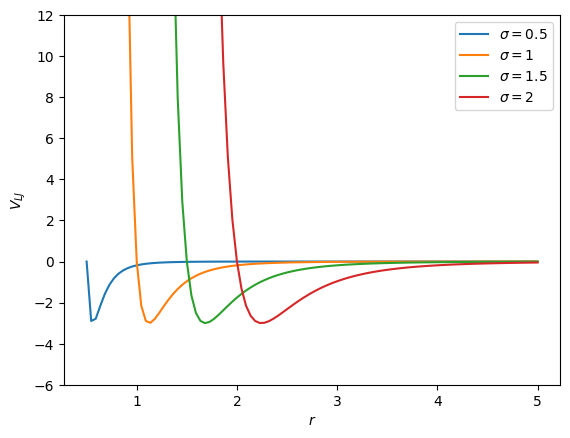

In [ ]:
r = np.linspace(0.5,5,100)

epsilon = 3

plt.ylabel("$V_{LJ}$")
plt.xlabel("$r$")

for sigma in [0.5, 1, 1.5, 2]:
  plt.plot(r, lj_potential(r,sigma,epsilon) , label=f"$\sigma=${sigma}")
plt.ylim(bottom=-2*epsilon,top=4*epsilon)
plt.legend()

## Exercise

Using $\sigma= 1.5$ plot different curves for each value of $\epsilon \in \{ 1,2,3,4\}$. Use the interval $r \in (0.1,5)$ and plot 100 points minimum per curve.

Hint: Use <code>plt.ylim((-5,2))</code>

What happens to the minium when differents $\epsilon$?

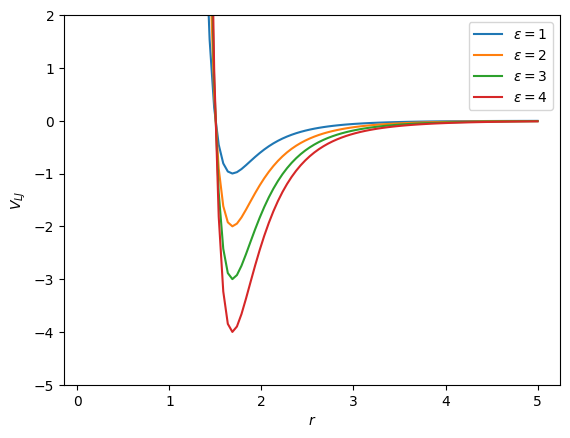

In [ ]:
r = np.linspace(0.1,5,100)

sigma = 1.5

plt.ylabel("$V_{LJ}$")
plt.xlabel("$r$")

for epsilon in [1,2,3,4]:
  plt.plot(r, lj_potential(r,sigma,epsilon) , label=f"$\epsilon=${epsilon}")
plt.ylim(bottom=-5,top=2)
plt.legend()

From now on we will use $\sigma=1$ and $\epsilon=1$ to simplify the expression of the potential.

$$V_\text{LJ} (r_{ij})= 4 \Big[  \left(\dfrac{1}{r_{ij}}\right)^{12} - \left(\dfrac{1}{r_{ij}}\right)^{6} \Big]$$

Here $r_{ij}$ is the distance between particles <code>i,j</code>.

#Force derivated from the Lennard-Jones potential

It is a pair-potential that depends on the distance of the particles only. However the force that the particles is vectorial.

This way the force that particle <code>i</code> receives from particle <code>j</code>.

$$\vec{f_{ij}}(\vec{r_{ij}}) = 24 \left[ \dfrac{2}{r_{ij}^{14}}  - \dfrac{1}{r_{ij}^{8}} \right] \vec{r_{ij}}$$

where $\vec{r_{ij}} = \vec{r_i} - \vec{r_j}$ and $r_{ij} = |\vec{r_{ij}}|$.

## Reminder

Last week we used the harmonic oscillator to couple particles. That is also a pair potential.

$$V_{h}(r_{ij}) = \dfrac{k}{2} r_{ij}^2$$

And the subsequent force that the particle <code>i</code> feels from the particle <code>j</code> is:

$$\vec{f_{ij}}(\vec{r_{ij}}) = k  \vec{r_{ij}} = k \left( \vec{r_i} - \vec{r_j}\right) = -k \left( \vec{r_j}-\vec{r_i} \right) $$


# Exercise

Make a code to simulate a system of $N$ particles that interact through the Lennard-Jones potential.

Use <code>N=4</code> with initial positions:

<code>x[1] = np.array([2,4,6,8])</code>
<code>v[1] = np.array([0,0,0,0])</code>

and mass:

<code>m = [1,1,1,1]</code>


Use the proper force(acceleration) and potential.

- Plot the trajectories in space.
- Plot the trajectories in phase space.
- Plot the momentum vs time.
- Plot the energy vs time.


Hint: Modify the code that we used for $N$ oscillators coupled with each other using basic Verlet. Change the force and energy!  


In [ ]:
#HARMONIC OSCILLATOR. CODE TO BE ADAPTED
#Model parameters
N = 4
k = 1
m = 9*np.random.rand(N)+1 #random numbers in [1,10]


#Integration parameters
N_steps = 10000
dt = 0.01

#Initialization of variables
t = np.zeros(N_steps+2)
x = np.zeros((N_steps+2,N))
v = np.zeros((N_steps+2,N))
a = np.zeros((N_steps+2,N))
E = np.zeros((N_steps+2))

#Initial conditions
x[1] = 2*np.random.rand(N)-1 #random positions in the interval [-1,1]
v[1] = np.zeros(N)
x[0] = x[1] - v[1]*dt
for i_n in range(N):
  E[1] +=  0.5*m[i_n]*v[1, i_n]**2 #kinetic
  for j_n in range(i_n,N):
    E[1] += 0.5*k*(x[1,i_n] - x[1,j_n])**2 #potential


#Integration steps
for i_t in range(2,N_steps+2):

  #compute accelerations
  for i_n in range(N):
    for j_n in range(N):
      a[i_t-1, i_n] += -k/m[i_n]*(x[i_t-1,i_n] - x[i_t-1,j_n])
  # if i_t < 10: print(f"i_t-1: {i_t-1} a0:{a[i_t-1,0]} a1:{a[i_t-1,1]}")

  #update position
  t[i_t] = t[i_t-1] + dt
  for i_n in range(N):
    x[i_t, i_n] = 2*x[i_t-1, i_n] - x[i_t -2, i_n] + dt**2 * a[i_t-1, i_n]
#update speed and energy
for i_t in range(2,N_steps+1):
  for i_n in range(N):
    v[i_t, i_n] = (x[i_t+1, i_n] - x[i_t-1, i_n])/(2*dt)
    v[i_t, i_n] = (x[i_t+1, i_n] - x[i_t-1, i_n])/(2*dt)
    E[i_t] +=  0.5*m[i_n]*v[i_t, i_n]**2 #kinetic

    for j_n in range(i_n,N):
      E[i_t] += 0.5*k*(x[i_t,i_n] - x[i_t,j_n])**2 #potential

#Plotting
for i_n in range(N):
  plt.plot(t[1:-1],x[1:-1, i_n], label=f"x_{i_n}")
plt.ylabel("x")
plt.xlabel("t")
plt.legend()
plt.show()

plt.plot(t[1:-1],E[1:-1])
plt.ylabel("E")
plt.xlabel("t")
plt.ylim(bottom=0, top=7)
plt.show()

for i_n in range(N):
  plt.plot(x[1:-1,i_n],m[i_n]*v[1:-1,i_n], label=f"x_{i_n}")
plt.xlabel("x")
plt.ylabel("p")
plt.legend()
plt.show()

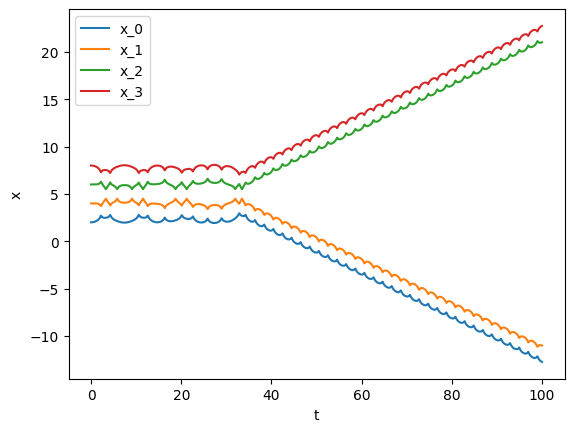

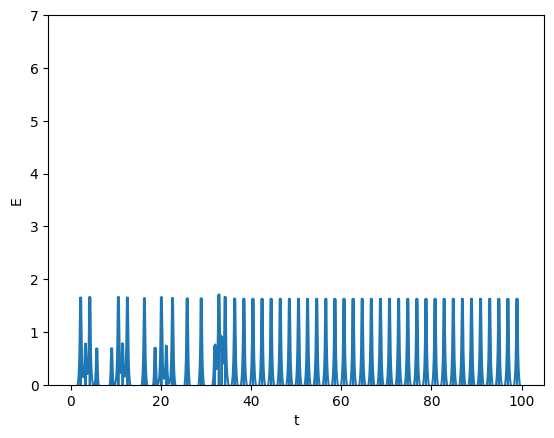

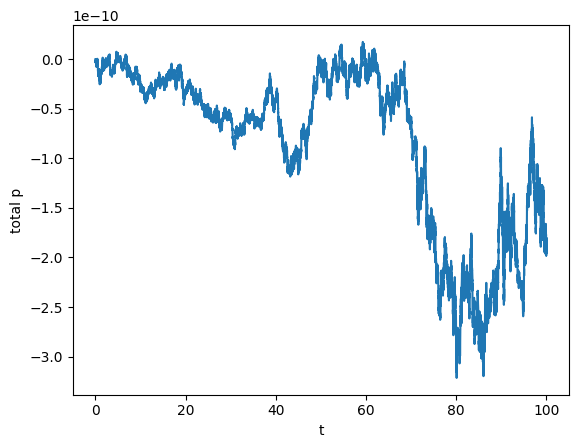

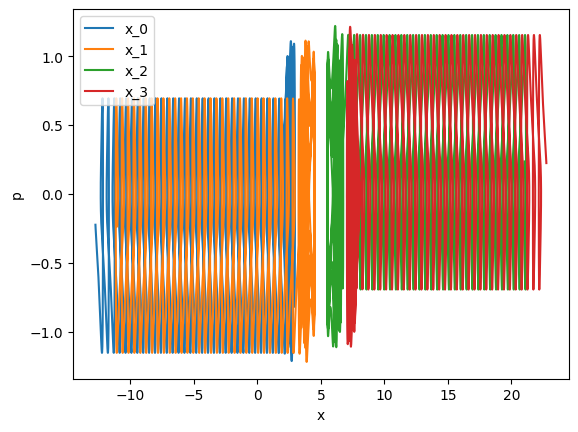

In [ ]:
#Model parameters
N = 4
m = [1,1,1,1] #random numbers in [1,10]


#Integration parameters
N_steps = 100000
dt = 0.001

#Initialization of variables
t = np.zeros(N_steps+2)
x = np.zeros((N_steps+2,N))
v = np.zeros((N_steps+2,N))
a = np.zeros((N_steps+2,N))
E = np.zeros((N_steps+2))
p = np.zeros(N_steps+2)

#Initial conditions
x[1] = np.array([2,4,6,8]) #random positions in the interval [-1,1]
v[1] = np.zeros(N)
x[0,:N] = x[1,:N] - v[1]*dt
for i_n in range(N):
  E[1] +=  0.5*m[i_n]*v[1, i_n]**2 #kinetic
  for j_n in range(i_n,N):
    if i_n != j_n:
      xij_norm = np.abs(x[1,i_n] - x[1,j_n])
      E[1] += 4*( (1/xij_norm**12) - (1/xij_norm**6)  ) #potential


#Integration steps
for i_t in range(2,N_steps+2):

  #compute accelerations
  for i_n in range(N):
    for j_n in range(N):
      if i_n != j_n:
        xij = x[i_t-1,i_n] - x[i_t-1,j_n]
        xij_norm = np.abs(xij)
        a[i_t-1, i_n] += 24/m[i_n]*(2/(xij_norm**14) - 1/(xij_norm**8))* xij

  #update position
  t[i_t] = t[i_t-1] + dt
  for i_n in range(N):
    x[i_t, i_n] = 2*x[i_t-1, i_n] - x[i_t -2, i_n] + dt**2 * a[i_t-1, i_n]
#update speed and energy
for i_t in range(2,N_steps+1):
  for i_n in range(N):
    v[i_t, i_n] = (x[i_t+1, i_n] - x[i_t-1, i_n])/(2*dt)
    v[i_t, i_n] = (x[i_t+1, i_n] - x[i_t-1, i_n])/(2*dt)
    p[i_t] += m[i_n]*v[i_t,i_n]
    E[i_t] +=  0.5*m[i_n]*v[i_t, i_n]**2 #kinetic
    for j_n in range(i_n,N):
      if i_n != j_n:
        xij_norm = np.abs(x[1,i_n] - x[1,j_n])
        E[i_t] += 4*( (1/xij_norm**12) - (1/xij_norm**6) )#potential

#Plotting
for i_n in range(N):
  plt.plot(t[1:-1],x[1:-1, i_n], label=f"x_{i_n}")
plt.ylabel("x")
plt.xlabel("t")
plt.legend()
plt.show()

plt.plot(t[1:-1],E[1:-1])
plt.ylabel("E")
plt.xlabel("t")
plt.ylim(bottom=0, top=7)
plt.show()


plt.plot(t[1:-1],p[1:-1])
plt.xlabel("t")
plt.ylabel("total p")
plt.show()

for i_n in range(N):
  plt.plot(x[1:-1,i_n],m[i_n]*v[1:-1,i_n], label=f"x_{i_n}")
plt.xlabel("x")
plt.ylabel("p")
plt.legend()
plt.show()